# Unsupervised Learning (Gözetimsiz Öğrenme)

* [K-means](#km)
    * [Segmentasyon Problemi](#km_seg)
    * [ Model ve Görselleştirme](#km_model)
    * [Elbow ile Optimim Küme Sayısının Belirlenmesi](#km_elbow)
* [Hierarchical Clustering](#hc)
    * [Uygulama-1](#hc1)
    * [Uygulama-2](#hc2)
* [Principal Component Analysis (Temel Bileşenler Analizi, PCA)](#pca)
    * [Uygulama](#pca_uyg)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means <a id = km />

**Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır.**

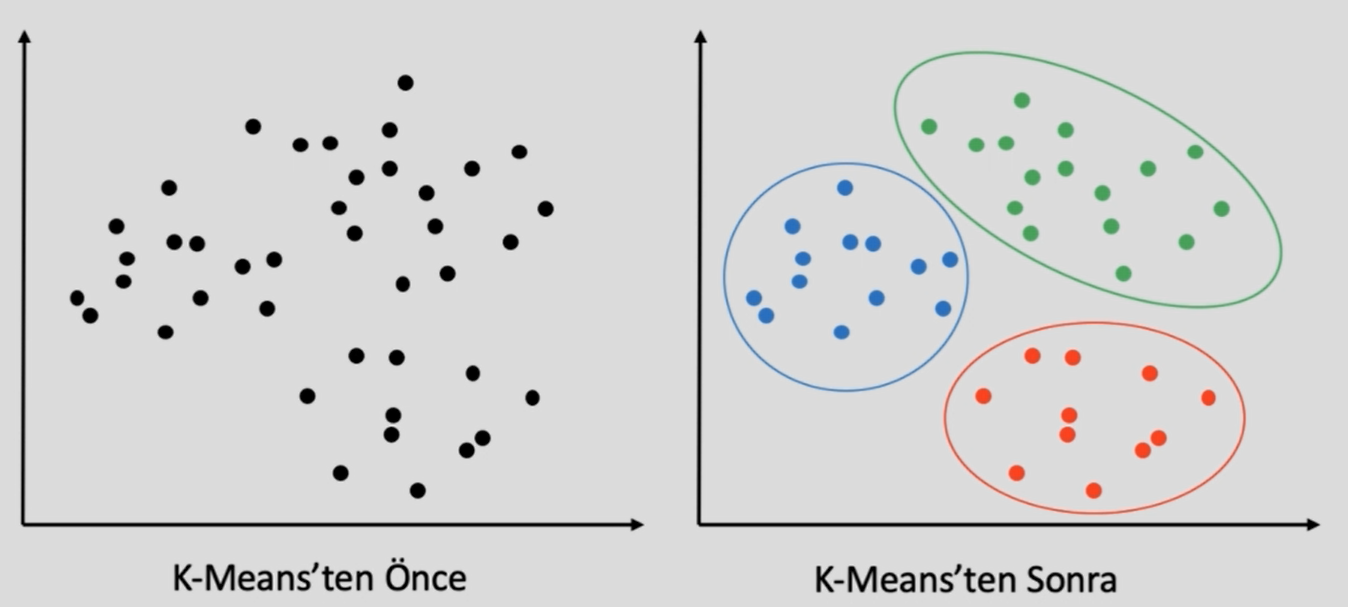

#### K-Means Adımları
* **Adım1:** Küme sayısı belirlenir.
* **Adım2:** Rastgele k merkez seçilir.
* **Adım3:** Her gözlem için k merkezlere uzaklıklar hesaplanır ve gözlemler kendisine en yakın k merkezine atanır.
* **Adım4:** Her gözlem kendine en yakın olduğu merkeze yani kümeye atanır.
* **Adım5:** Atama işlemlerinden sonra oluşan kümeler için merkez hesaplamaları yapılır
* **Adım6:** Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının toplamının (total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.

## Segmentasyon Problemi <a id = km_seg />

In [4]:
df = pd.read_csv("USArrests.csv", index_col = 0).copy() # index_col = 0 
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [7]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
df.info()#hepsi sürekli değişken

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


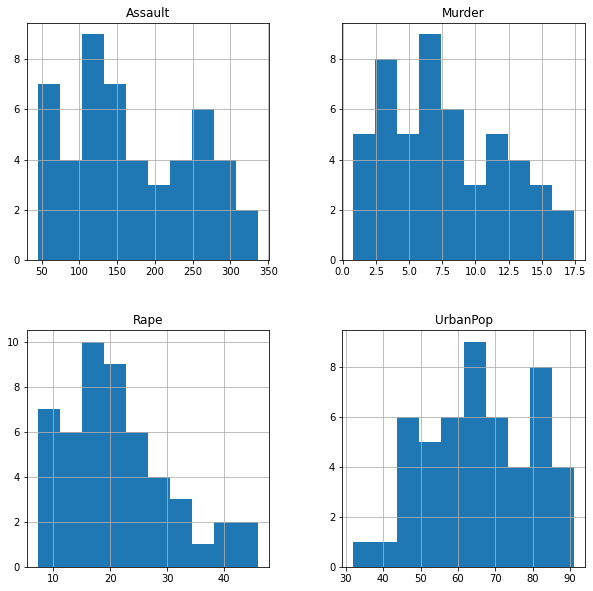

In [12]:
df.hist(figsize = (10, 10));

## Model ve Görselleştirme <a id = km_model />

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
?kmeans

Type:        KMeans
String form:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
File:        c:\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py
Docstring:  
K-Means clustering

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, optional, default: 8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random' or an ndarray}
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial center

In [15]:
k_fit = kmeans.fit(df)

In [16]:
k_fit.n_clusters

4

In [17]:
k_fit.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [18]:
k_fit.labels_

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3])

In [19]:
# görselleştirme 
kmeans= KMeans(n_clusters=2)
k_fit = kmeans.fit(df)

In [20]:
kumeler = k_fit.labels_

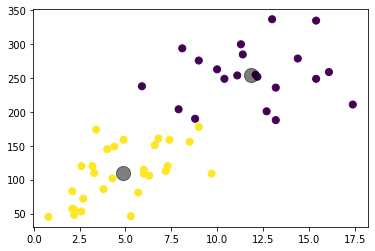

In [22]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kumeler, s=50, cmap="viridis");

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:, 0], merkezler[:, 1], c= "black", s=200, alpha=0.5);

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [24]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = k_fit.cluster_centers_

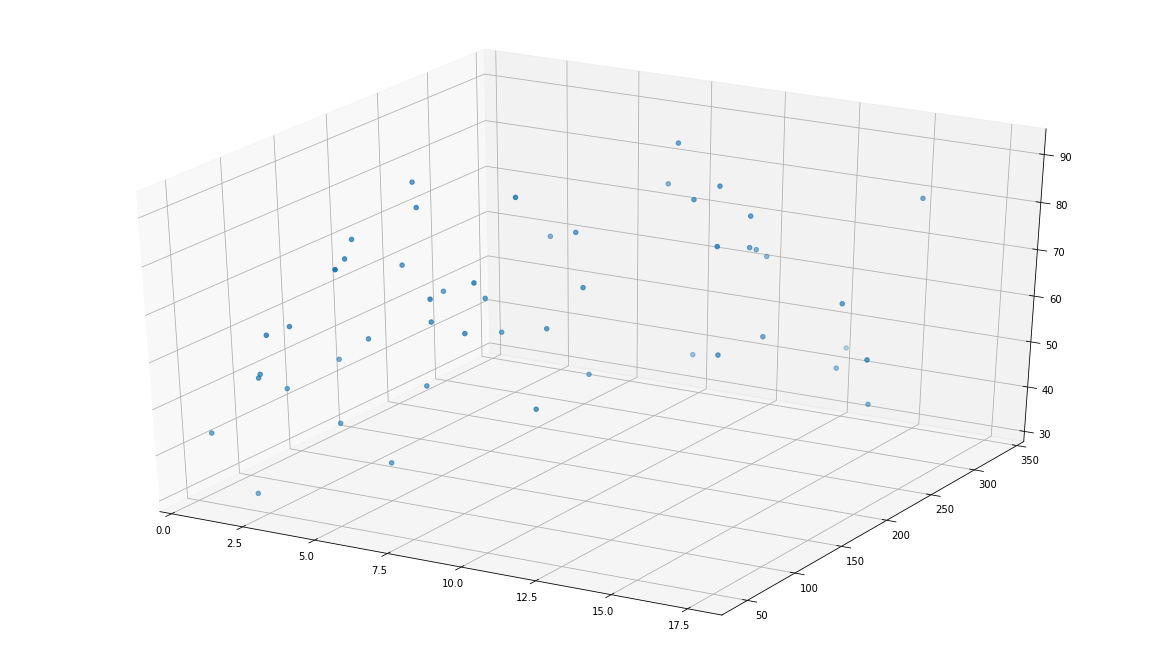

In [25]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

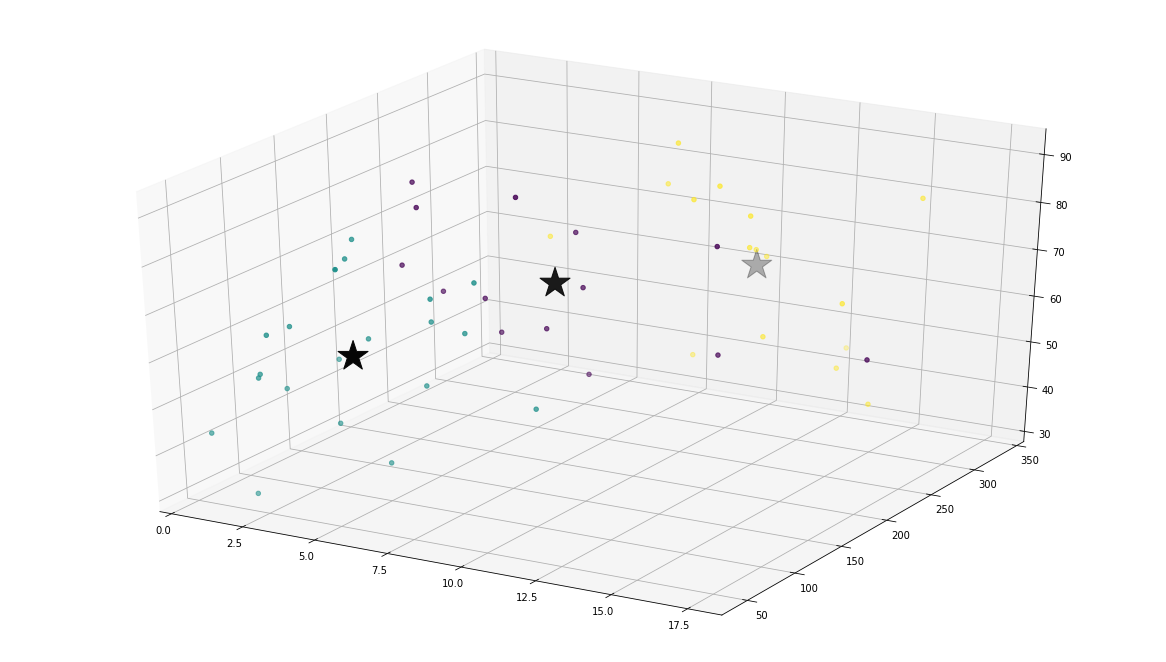

In [26]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c = kumeler);
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], marker = "*", c = '#050505', s=1000);

In [ ]:
# kumeler ve gözlem birimleri

In [28]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [29]:
pd.DataFrame({"Eyaletler":df.index, "Kumeler":kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,0


In [30]:
df["kume_no"] = kumeler

In [31]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [32]:
df["kume_no"] = df["kume_no"] + 1

In [33]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


## Elbow ile Optimum Küme Sayısının Belirlenmesi <a id = km_elbow />

In [34]:
#!pip install yellowbrick

In [35]:
from yellowbrick.cluster import KElbowVisualizer

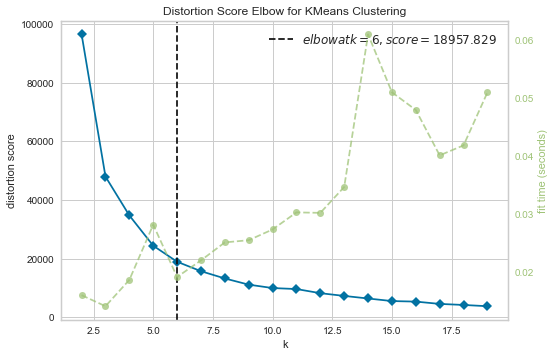

In [36]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(df)
visualizer.poof()

# Hierarchical Clustering (Hiyerarşik Kümeleme) <a id = hc />

Amaç gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır.

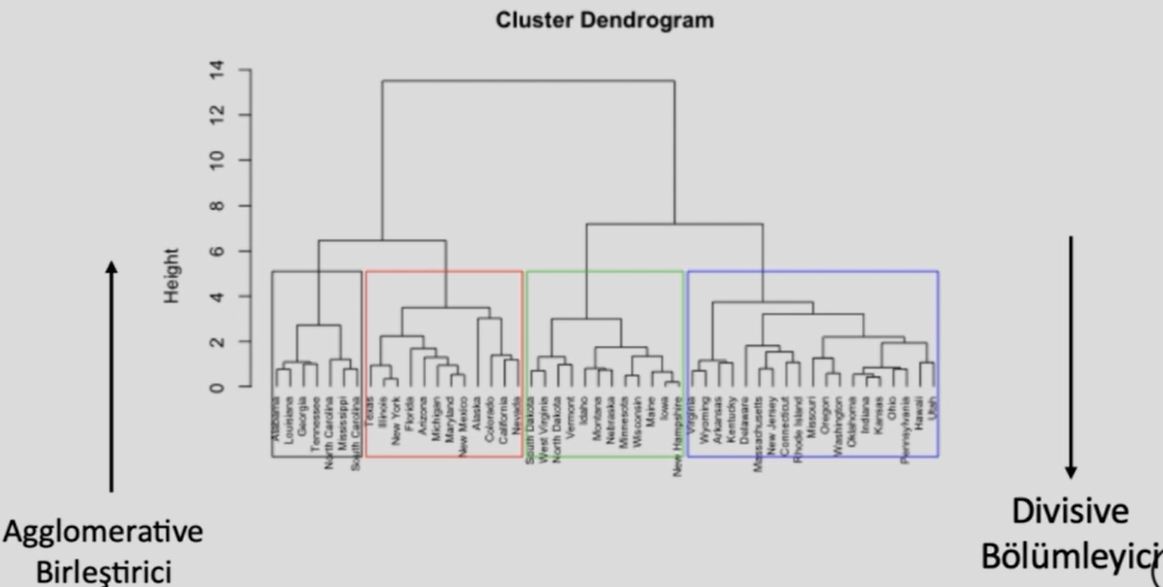

In [37]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


## UYGULAMA 1  <a id = hc1 />

In [38]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

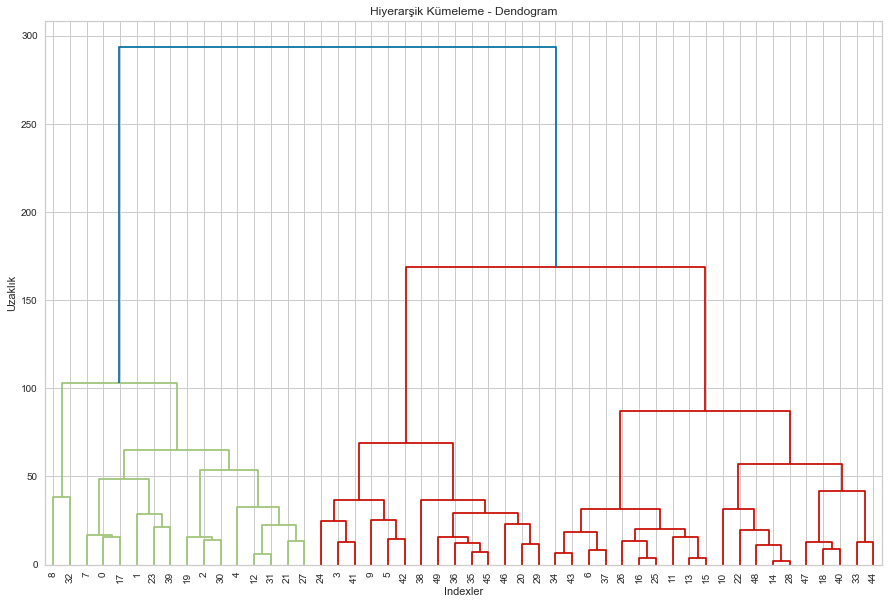

In [40]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize = (15, 10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_complete, leaf_font_size = 10);

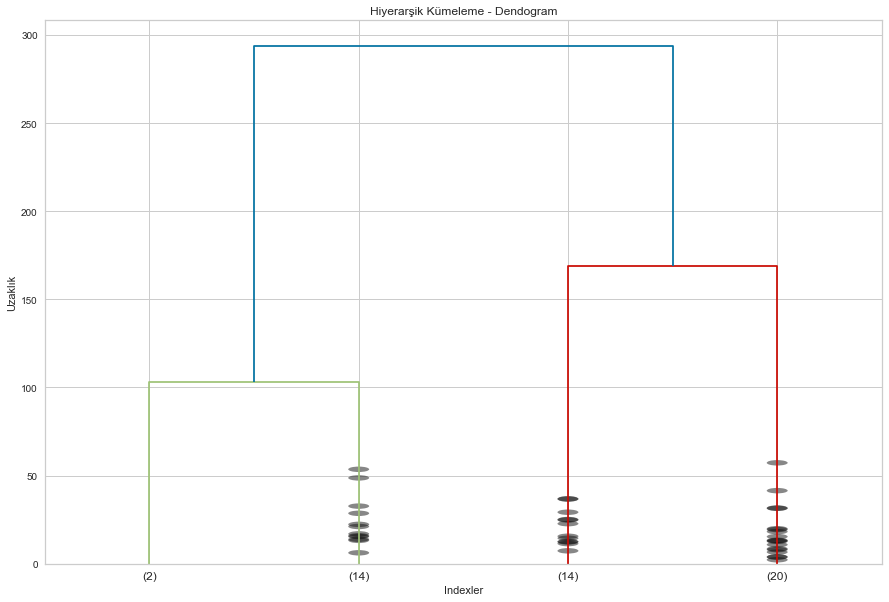

In [43]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize = (15, 10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_complete, truncate_mode='lastp', p=4, show_contracted=True);

## UYGULAMA 2 <a id = hc2 />

#### Optimum Küme Sayısı

In [ ]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize = (15, 10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(hc_complete, leaf_font_size = 10); 

In [44]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

# Principal Component Analysis <a id = pca />

Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektir.

Diğer bir ifade ile: Küçük miktarda  bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır.

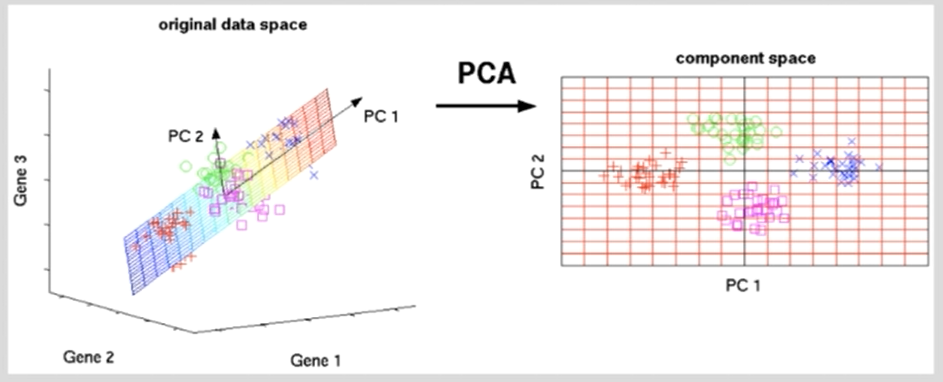

## Uygulama <a id = pca_uyg />

In [53]:
df = pd.read_csv("USArrests.csv", index_col = 0).copy() # index_col = 0 
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [55]:
from sklearn.preprocessing import StandardScaler

df= StandardScaler().fit_transform(df)

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

In [58]:
bilesen_df = pd.DataFrame(data=pca_fit, columns=["bierinci_bilesen","ikinci_bilesen"])